# 音の情報処理（発展的演習）：メルケプストラム特徴量と判別

スペクトル分析までを学習したところで、母音「あいうえお」の判別をやってみましょう。  
男性音声と女性音声では、パワースペクトルはずいぶん違うように見えますが、どちらも「あ」は「あ」ですよね？   
どうしたら男女で共通する「あ」の特徴を見つけることができるでしょうか？

## 1. 男性音声と女性音声の母音のパワースペクトル

まず男性音声と女性音声の母音のパワースペクトルを可視化してみましょう。

女性と男性のパワースペクトルを見比べてみると、低周波数帯で見られる等間隔の棘は、女性音声のほうが棘の間隔が広く、男性音声のほうが棘の間隔が狭いという違いはありますが、その細かいギザギザは無視して大きな山の動きを見ると、なんとなく似ていることが分かります。   
入力ファイルを「い」「う」「え」「お」と変えてみてください。
すると、「あ」と「い」のように異なる母音間ではなだらかな山の形が違うけど、
同じ母音同士であれば似ていることが分かるでしょう。


<IPython.core.display.Javascript object>


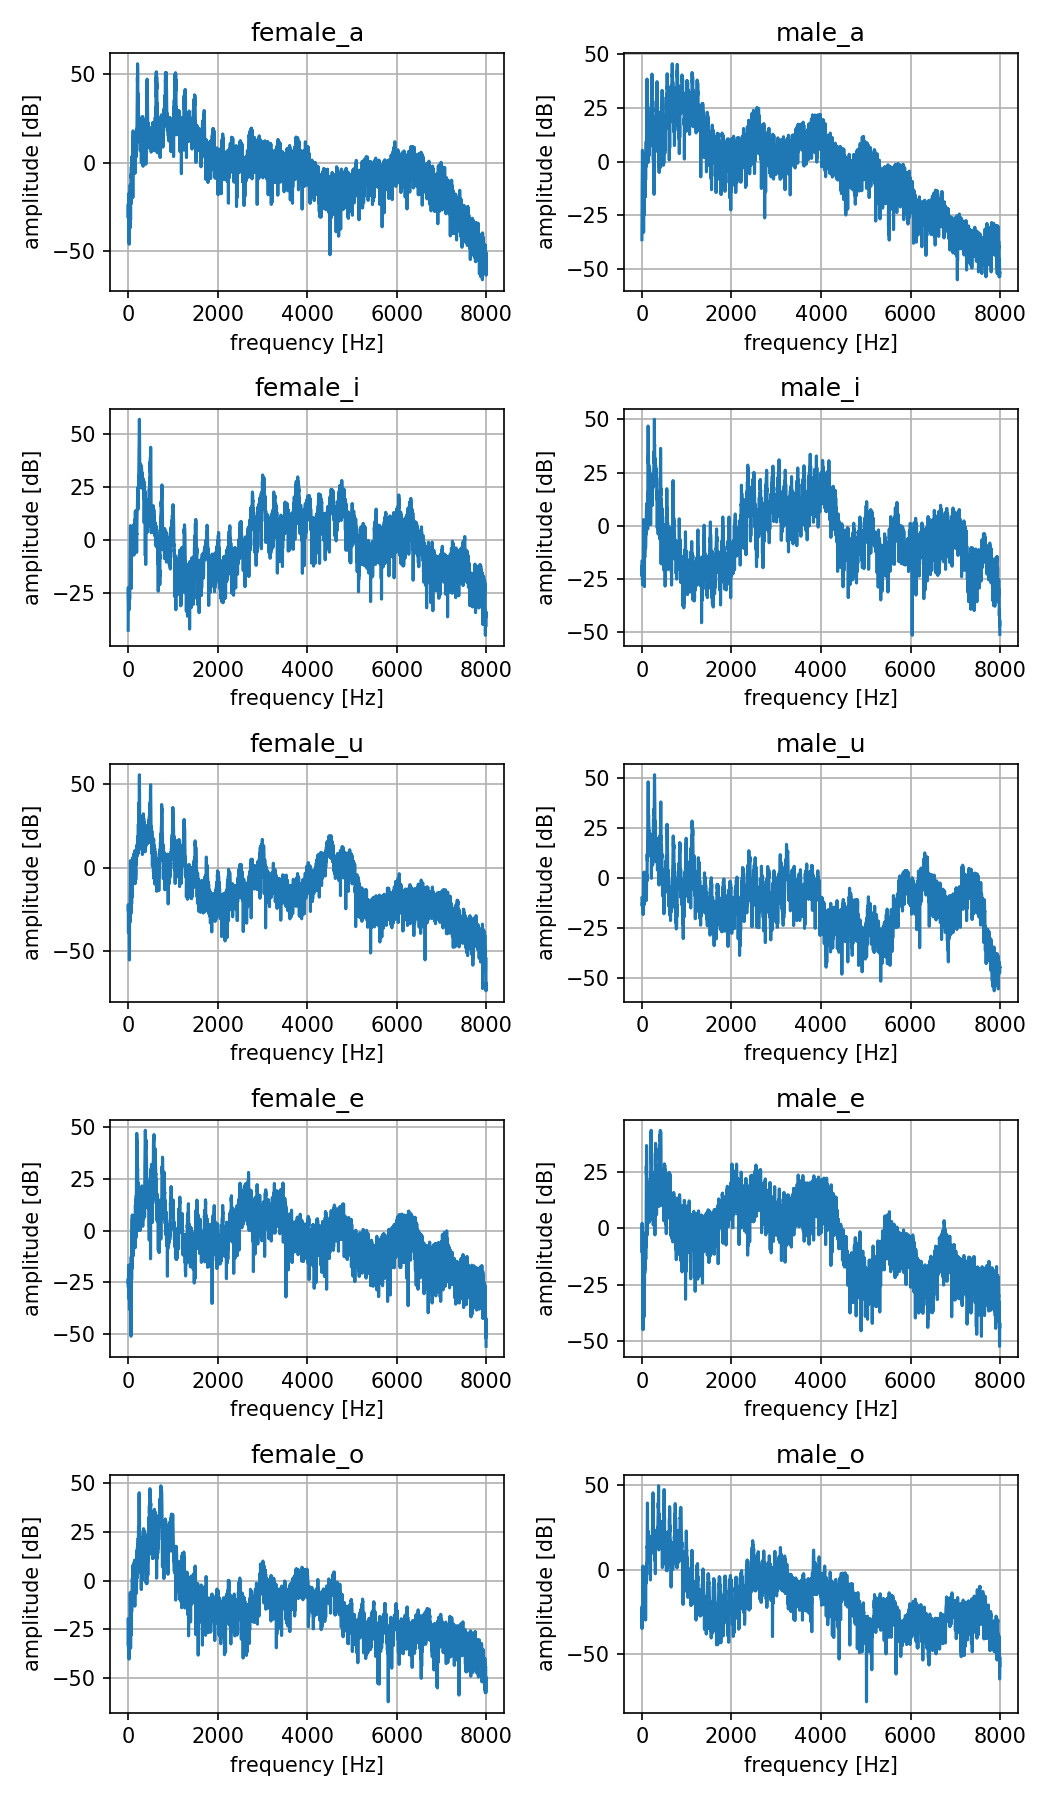

In [1]:
%matplotlib notebook
import wave
import numpy as np
import matplotlib.pyplot as plt

files = ['sounds/female_a.wav', 'sounds/male_a.wav', # 「あ」の音声
         'sounds/female_i.wav', 'sounds/male_i.wav', # 「い」の音声
         'sounds/female_u.wav', 'sounds/male_u.wav', # 「う」の音声
         'sounds/female_e.wav', 'sounds/male_e.wav', # 「え」の音声
         'sounds/female_o.wav', 'sounds/male_o.wav'] # 「お」の音声
titles = ['female_a', 'male_a',
          'female_i', 'male_i',
          'female_u', 'male_u',
          'female_e', 'male_e',
          'female_o', 'male_o'
         ]

fig = plt.figure(figsize=(7, 12)) # figure(図を配置する画面)のサイズを指定
for i in range(10):
    
    wavfile = wave.open(files[i], 'rb')
    x = wavfile.readframes(wavfile.getnframes()) # 波形の読み込み
    sampling_rate = wavfile.getframerate()  # フレームレート[1/s]b
    sample_size = wavfile.getsampwidth() # 1サンプルあたりのサイズ
    wavfile.close()

    x = np.frombuffer(x, dtype= "int16") # バイナリデータをint型に変換
    x = x/(2**(8 * sample_size) / 2)# 正規化
    xlabel = np.arange(0, len(x)/sampling_rate, 1.0/sampling_rate) # X軸ラベルの生成
    X = np.fft.fft(x)  # FFTでフーリエ変換
    amplitude = 20*np.log10(np.abs(X))  # 振幅スペクトル
    x_axis = [i/len(X)*sampling_rate for i in range(0, int(len(X)/2)-1)]

    # 振幅スペクトルを描画
    ax = plt.subplot(5, 2, i+1) 
    ax.plot(x_axis[0:int(len(X)/2-1)], amplitude[0:int(len(X)/2)-1])
    ax.set_xlabel("frequency [Hz]")
    ax.set_ylabel("amplitude [dB]")
    ax.set_title(titles[i])
    ax.grid()
    
fig.tight_layout() # 図がはみ出さないようにレイアウト
plt.savefig('fig/SoundProcessing5-1.png') # 図を画像として保存

## 2. 母音のメルケプストラム

パワースペクトルの大きな動きの特徴を抽出したものとして、今回はケプストラム特徴というのを使います（スライドで説明します）。   
さらに、人間の周波数感度のフィルタを導入したものがメルケプストラムです。   

人間の聴覚は低周波帯域では少しの周波数の違いを聞き分けることができるのですが、
周波数が高くなるにつれて周波数の違いに鈍感になっていきます。   
よって、低周波は高密度かつ狭い範囲でサンプルを取り、高周波になるにつれて広い範囲で大雑把にサンプルを取るフィルタをメルフィルタと呼びます。  
メルケプストラムはこのメルフィルタを利用しています。

女性男性音声の「あいうえお」のメルケプストラムを描画してみましょう。  
男女で共通する特徴を見つけられるでしょうか？

<IPython.core.display.Javascript object>


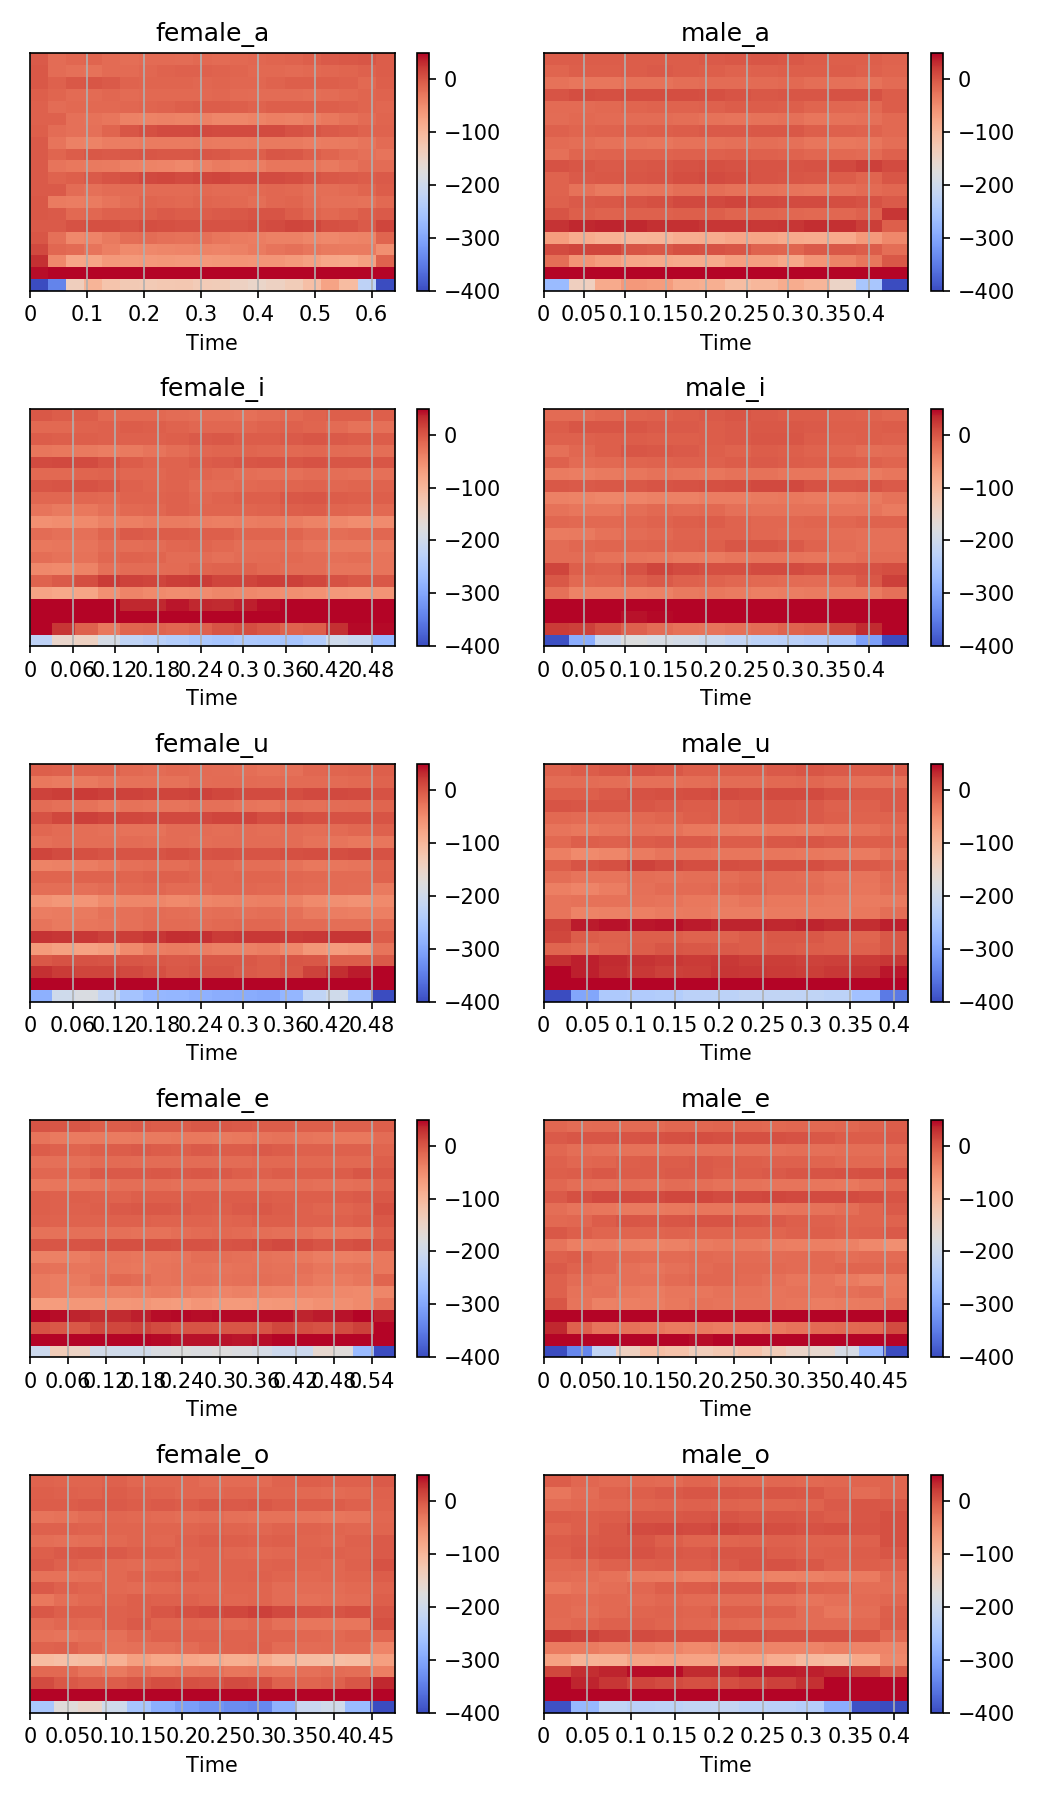

In [2]:
import librosa
import librosa.display

files = ['sounds/female_a.wav', 'sounds/male_a.wav', # 「あ」の音声
         'sounds/female_i.wav', 'sounds/male_i.wav', # 「い」の音声
         'sounds/female_u.wav', 'sounds/male_u.wav', # 「う」の音声
         'sounds/female_e.wav', 'sounds/male_e.wav', # 「え」の音声
         'sounds/female_o.wav', 'sounds/male_o.wav'] # 「お」の音声
titles = ['female_a', 'male_a',
          'female_i', 'male_i',
          'female_u', 'male_u',
          'female_e', 'male_e',
          'female_o', 'male_o'
         ]

fig = plt.figure(figsize=(7, 12)) # figure(図を配置する画面)のサイズを指定
for i in range(10):

    y, sr = librosa.load(files[i], sr=16000)
    mfcc0 = librosa.feature.mfcc(y, sr=sr)

    # MFCCを可視化
    ax = plt.subplot(5, 2, i+1) 
    librosa.display.specshow(mfcc0, sr=sr, x_axis='time',
                             vmax = 50, vmin = -400) # 値に対する色をそろえるため、最小-600、最大100として色塗り
    plt.colorbar()
    ax.set_title(titles[i])
    ax.grid()
    
fig.tight_layout() # 図がはみ出さないようにレイアウト
plt.savefig('fig/SoundProcessing5-2.png') # 図を画像として保存

## 3. 楽器の音のMFCC

同じく、ピアノとヴァイオリンの音（いずれもA4（ラ、およそ440Hz）の音のMFCCを比較してみましょう。
ピアノだけがヴァイオリンと違うのが分かりますか？

<IPython.core.display.Javascript object>


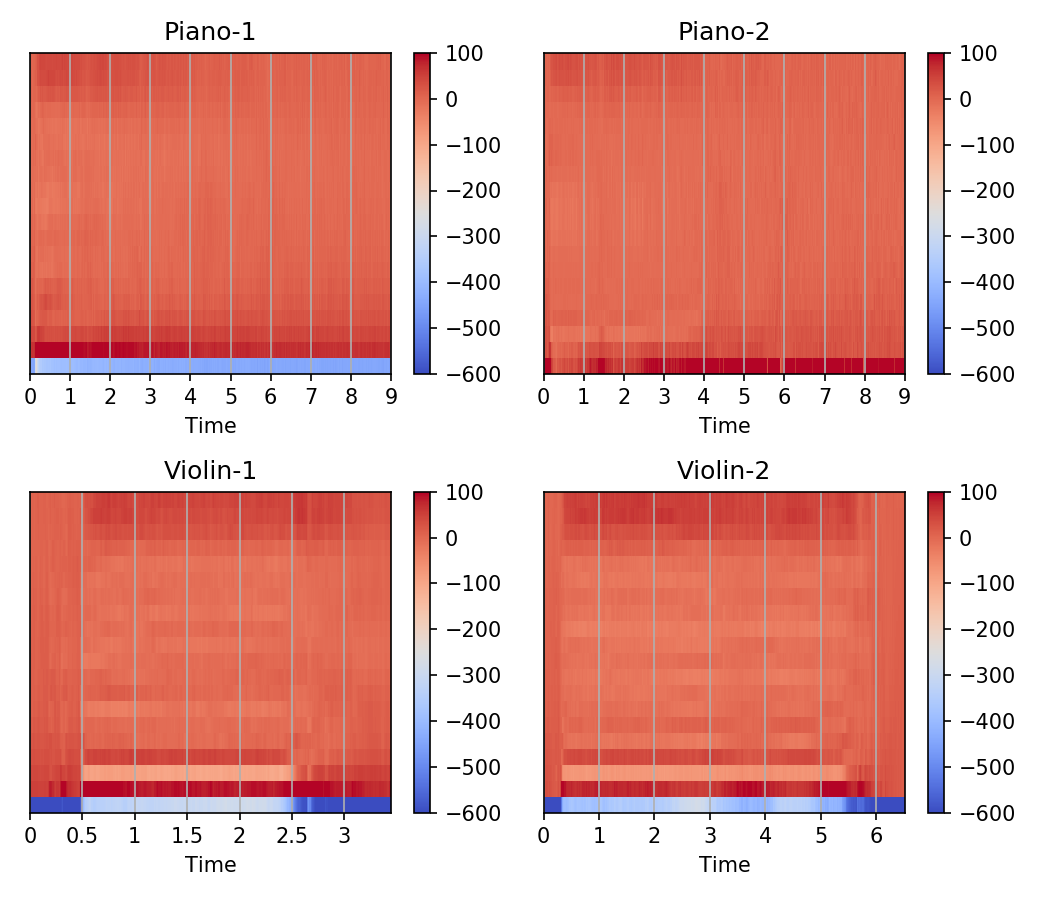

In [3]:
import librosa
import librosa.display

files = ['sounds/Piano-A4-1.wav', 'sounds/Piano-A4-2.wav', # ピアノのA4の音
         'sounds/Violin-A4-1.wav', 'sounds/Violin-A4-2.wav'] # ヴァイオリンのA4の音
titles = ['Piano-1', 'Piano-2',
          'Violin-1', 'Violin-2']

fig = plt.figure(figsize=(7, 6)) # figure(図を配置する画面)のサイズを指定
for i in range(4):
    
    wavfile = wave.open(files[i], 'rb')
    sampling_rate = wavfile.getframerate()  # フレームレート[1/s]b
    wavfile.close()

    y, sr = librosa.load(files[i], sr=sampling_rate)
    mfcc0 = librosa.feature.mfcc(y, sr=sr)

    # MFCCを可視化
    ax = plt.subplot(2, 2, i+1) 
    librosa.display.specshow(mfcc0, sr=sr, x_axis='time', 
                             vmax = 100, vmin = -600) # 値に対する色をそろえるため、最小-600、最大100として色塗り
    plt.colorbar()
    ax.set_title(titles[i])
    ax.grid()
    
fig.tight_layout() # 図がはみ出さないようにレイアウト
plt.savefig('fig/SoundProcessing5-3.png') # 図を画像として保存

さて問題です。次の音声はピアノとヴァイオリンどちらでしょうか？

<IPython.core.display.Javascript object>


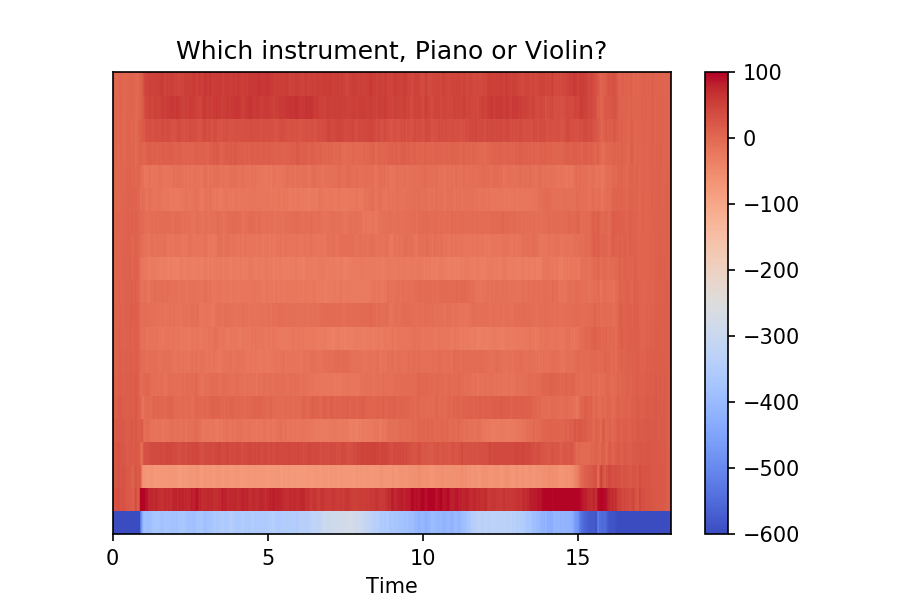

Text(0.5, 1.0, 'Which instrument, Piano or Violin?')

In [4]:
y, sr = librosa.load('sounds/SomeInstrument.wav', sr=16000)
mfcc3 = librosa.feature.mfcc(y, sr=sr)

fig = plt.figure(figsize=(6, 4)) # figure(図を配置する画面)のサイズを指定
librosa.display.specshow(mfcc0, sr=sr, x_axis='time', vmax = 100, vmin = -600)
plt.colorbar()
plt.title('Which instrument, Piano or Violin?')